In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import spectrum_utils.plot as sup
import spectrum_utils.spectrum as sus
import urllib.parse
import bio_helper
import tools
import seaborn as sns
from tools import *
%load_ext autoreload
%autoreload 2
from importlib import reload
reload(bio_helper)
plt.style.use([])
import sys
sys.path.append("..")
from ms import finetune
from fdr_test import fixed_features

In [6]:


topk_ranking=100000
frag_model = 'prosit_l1'

data2plot = {}

topk2show = [0.01*i for i in range(1, 21)]
for which in ['trypsin', 'chymo', 'gluc', 'lysc']:
    save_tab = f"/data/prosit/figs/fig235/{which}/percolator_up/try/{frag_model}"
    
    tabs_dir = os.path.join(save_tab, "no_finetuned")
    features = pd.read_csv(os.path.join(tabs_dir, "prosit_best.tab"), sep='\t')
    
    prosit_sa = features['spectral_angle']
    andromeda = features['andromeda']
    labels = features['Label']

    sa_order = np.argsort(prosit_sa)
    andromeda_order = np.argsort(andromeda)
    
    pre = []
    pre_andro = []
    for topk in topk2show:
        topk = int(topk*len(labels))
        select_labels = np.array(labels)[sa_order[-topk:]]
        pre.append((select_labels == -1).mean()*100)
        select_labels = np.array(labels)[andromeda_order[-topk:]]
        pre_andro.append((select_labels == -1).mean()*100)
    data2plot[which] = (pre, pre_andro)



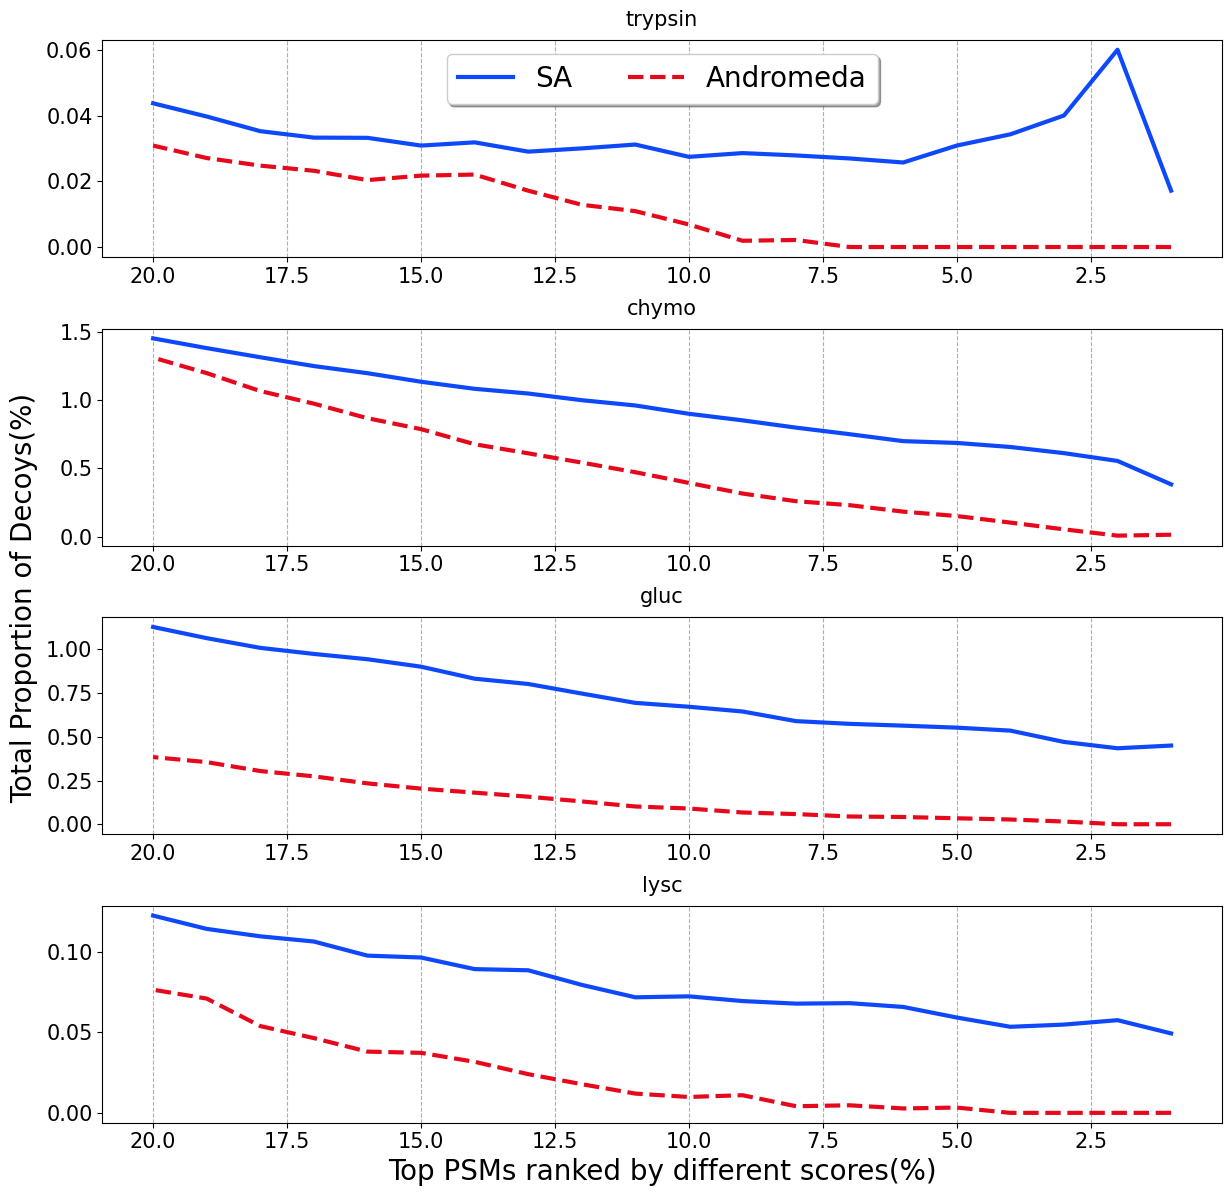

In [7]:
import matplotlib as mpl
plt.style.use(['ieee', "high-vis", 'no-latex'])
plt.rcParams["font.family"] = "DejaVu Sans"

fig, axs = plt.subplots(4, figsize=(12, 12), dpi=100)
topk2plot = [i*100 for i in topk2show]

for i, (name, data) in enumerate(data2plot.items()):
    axs[i].invert_xaxis()
    axs[i].xaxis.grid(linestyle='--')
    axs[i].plot(topk2plot, data[0], label="SA", linewidth=3)
    axs[i].plot(topk2plot, data[1], label="Andromeda", linewidth=3)
    # axs[0].legend(prop={'size': 20})
    # axs[0].set_xlabel("Top PSMs ranked by SA(%)", fontsize=20)
    # axs[0].set_ylabel("Total Proportion of Decoys(%)", fontsize=20)
    # axs[0].set_ylim(0, 7)
    axs[i].tick_params(axis='x', labelsize=15)
    axs[i].tick_params(axis='y', labelsize=15)
    axs[i].set_title(name, fontsize=15, pad=10)
    if i == 0:
        axs[i].legend(loc='upper center', bbox_to_anchor=(
            0.5, 1), fancybox=True, shadow=True, ncol=5, prop={'size': 20})
    if i == len(data2plot)-1:
        axs[i].set_xlabel("Top PSMs ranked by different scores(%)", fontsize=20)
fig.tight_layout()
fig.text(-0.02, 0.5, 'Total Proportion of Decoys(%)',
         va='center', rotation='vertical', fontsize=20)
# axs[1].invert_xaxis()
# axs[1].xaxis.grid(linestyle='--')
# for name, data in data2plot.items():
#     axs[1].plot(topk2plot, data[1], label=name, linewidth=3)
# # axs[1].legend(prop={'size': 20})
# axs[1].set_xlabel("Top PSMs ranked by Andromeda(%)", fontsize=20)
# axs[1].set_ylabel("Total Proportion of Decoys(%)", fontsize=20)
# axs[1].set_ylim(0, 7)
# axs[1].tick_params(axis='x', labelsize=15)
# axs[1].tick_params(axis='y', labelsize=15)
# axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
#               fancybox=True, shadow=True, ncol=5, prop={'size': 20})
plt.savefig("fig/fig1-b-proportion.svg", dpi=300)
mpl.rcParams.update(mpl.rcParamsDefault)


In [8]:
topk_ranking = 100000
frag_model = 'prosit_l1'

data2plot_fine = {}

topk2show = [0.01*i for i in range(1, 21)]
for which in ['chymo', 'gluc']:
    save_tab = f"/data/prosit/figs/fig235/{which}/percolator_up/try/{frag_model}"

    tabs_dir = os.path.join(save_tab, "finetuned")
    no_tabs_dir = os.path.join(save_tab, "no_finetuned")
    features = pd.read_csv(os.path.join(
        tabs_dir, "sa.tab"), sep='\t')
    no_features = pd.read_csv(os.path.join(
        no_tabs_dir, "sa.tab"), sep='\t')

    prosit_sa = features['spectral_angle']
    labels = features['Label']

    no_sa = no_features['spectral_angle']
    no_labels = no_features['Label']
    print(len(labels), len(no_labels))
    sa_order = np.argsort(prosit_sa)
    no_sa_order = np.argsort(no_sa)

    pre = []
    pre_andro = []
    for topk in topk2show:
        topk = int(topk*len(labels))
        select_labels = np.array(labels)[sa_order[-topk:]]
        pre.append((select_labels == -1).mean()*100)
        select_labels = np.array(no_labels)[no_sa_order[-topk:]]
        pre_andro.append((select_labels == -1).mean()*100)
    data2plot_fine[which] = (pre, pre_andro)


758992 758992
644520 644520


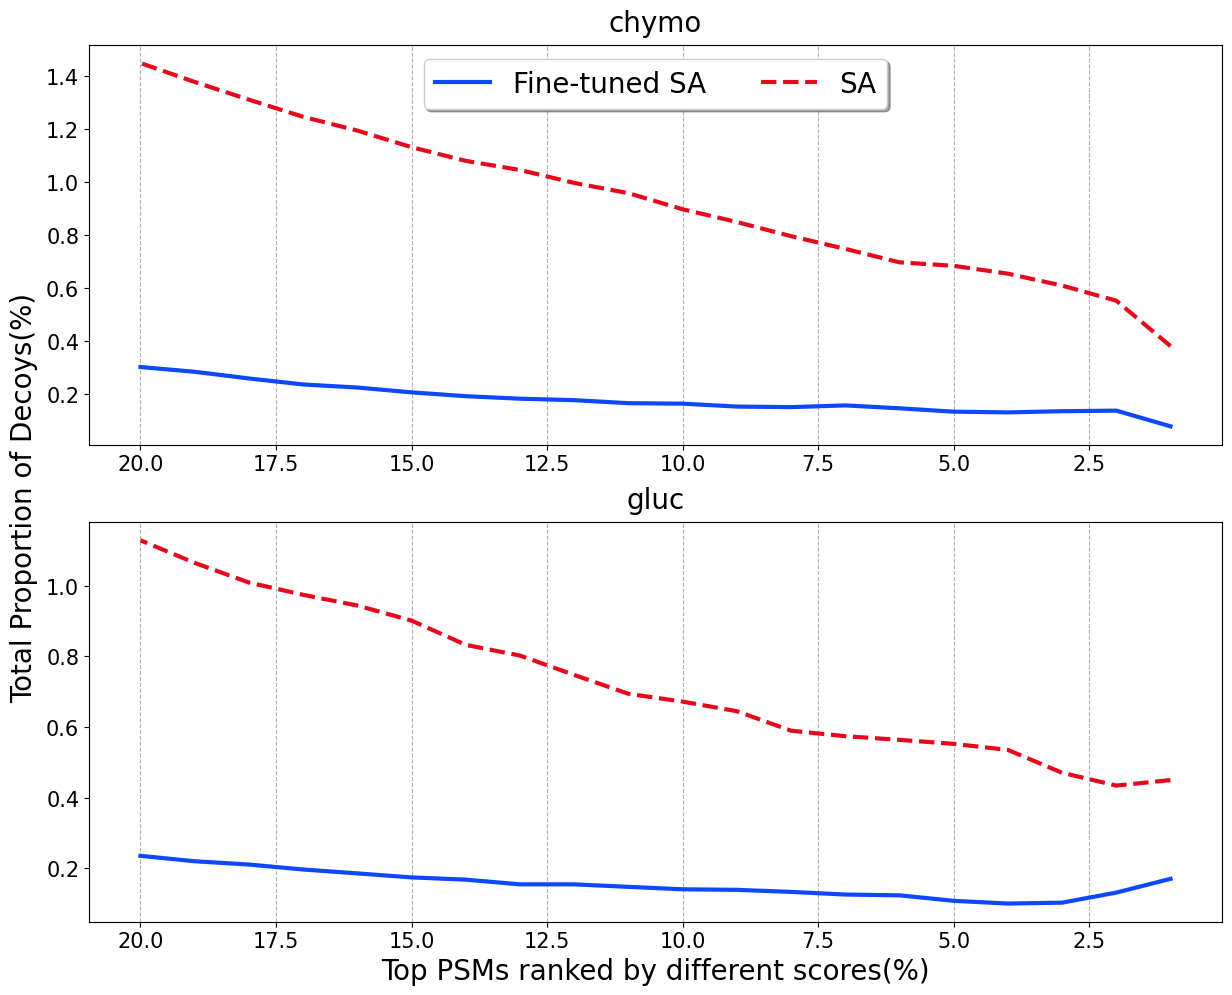

In [11]:
import matplotlib as mpl
plt.style.use(['ieee', "high-vis", 'no-latex'])
plt.rcParams["font.family"] = "DejaVu Sans"

topk2plot = [i*100 for i in topk2show]
fig, axs = plt.subplots(2, figsize=(12, 10), dpi=100)
for i, (name, data) in enumerate(data2plot_fine.items()):
    axs[i].invert_xaxis()
    axs[i].xaxis.grid(linestyle='--')
    axs[i].plot(topk2plot, data[0], label="Fine-tuned SA", linewidth=3)
    axs[i].plot(topk2plot, data[1], label="SA", linewidth=3)
    axs[i].tick_params(axis='x', labelsize=15)
    axs[i].tick_params(axis='y', labelsize=15)
    axs[i].set_title(name, fontsize=20, pad=10)
    if i == 0:
        axs[i].legend(loc='upper center', bbox_to_anchor=(
            0.5, 1), fancybox=True, shadow=True, ncol=5, prop={'size': 20})
    if i == len(data2plot_fine)-1:
        axs[i].set_xlabel("Top PSMs ranked by different scores(%)", fontsize=20)
fig.tight_layout()
fig.text(-0.02, 0.5, 'Total Proportion of Decoys(%)',
         va='center', rotation='vertical', fontsize=20)
# axs[0].legend(prop={'size': 20})
# axs.set_xlabel("Top PSMs ranked by SA(%)", fontsize=20)
# axs.set_ylabel("Total Proportion of Decoys(%)", fontsize=20)
# axs.tick_params(axis='x', labelsize=15)
# axs.tick_params(axis='y', labelsize=15)

# axs[1].invert_xaxis()
# axs[1].xaxis.grid(linestyle='--')
# for name, data in data2plot.items():
#     axs[1].plot(topk2show, data[1], label=name, linewidth=3)
# # axs[1].legend(prop={'size': 20})
# axs[1].set_xlabel("Top PSMs ranked by Andromeda", fontsize=20)
# axs[1].set_ylabel("Total Proportion of Decoys(%)", fontsize=20)
# axs[1].tick_params(axis='x', labelsize=15)
# axs[1].tick_params(axis='y', labelsize=15)
# axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
#               fancybox=True, shadow=True, ncol=5, prop={'size': 20})
plt.savefig("fig/fig1-b-finetuned-proportion.svg", dpi=300)
mpl.rcParams.update(mpl.rcParamsDefault)
